In [67]:
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [10]:
# import training and validating dataset
training_df = pd.read_csv(os.path.join(os.path.abspath(""), '../datasets/merged/training_dataset.csv'))
val_df = pd.read_csv(os.path.join(os.path.abspath(""), '../datasets/merged/validate_dataset.csv')) 

In [85]:
training_df.drop('Unnamed: 0',axis=1,inplace=True)
training_df.head()

,Date_ID,Crop_ID,Climate_ID,Region_ID,Month,NumberOfDaysInMonth,Quarter,Year,LeapYear,Minimum Temperature,...,Quebec,Saskatchewan,Territories,Yukon,Atlantic_Region,British Columbia_Region,Canada_Region,Prairies_Region,Territories_Region,Total_Value
0,88,6,533,5,5,31,2,2008,1,3,...,True,False,False,False,False,False,True,False,False,1
1,32,5,193,12,9,30,3,2003,0,5,...,False,False,False,False,False,False,False,True,False,1
2,35,4,210,13,12,31,4,2003,0,5,...,False,False,False,False,False,True,False,False,False,1
3,94,6,566,11,11,30,4,2008,1,3,...,False,True,False,False,False,False,False,True,False,2
4,62,4,374,10,3,31,1,2006,0,5,...,False,True,False,False,False,False,False,True,False,1


In [86]:
X_train = training_df.drop('Total_Value',axis=1)
X_train.head()

,Date_ID,Crop_ID,Climate_ID,Region_ID,Month,NumberOfDaysInMonth,Quarter,Year,LeapYear,Minimum Temperature,...,Prince Edward Island,Quebec,Saskatchewan,Territories,Yukon,Atlantic_Region,British Columbia_Region,Canada_Region,Prairies_Region,Territories_Region
0,88,6,533,5,5,31,2,2008,1,3,...,False,True,False,False,False,False,False,True,False,False
1,32,5,193,12,9,30,3,2003,0,5,...,False,False,False,False,False,False,False,False,True,False
2,35,4,210,13,12,31,4,2003,0,5,...,False,False,False,False,False,False,True,False,False,False
3,94,6,566,11,11,30,4,2008,1,3,...,False,False,True,False,False,False,False,False,True,False
4,62,4,374,10,3,31,1,2006,0,5,...,False,False,True,False,False,False,False,False,True,False


In [87]:
y_train = training_df['Total_Value']
y_train.head()

0    1
1    1
2    1
3    2
4    1
Name: Total_Value, dtype: int64

In [88]:
X_val = val_df.drop(['Unnamed: 0','Total_Value'],axis=1)
y_val = val_df['Total_Value'] 

In [89]:
X_val.head()

,Date_ID,Crop_ID,Climate_ID,Region_ID,Month,NumberOfDaysInMonth,Quarter,Year,LeapYear,Minimum Temperature,...,Prince Edward Island,Quebec,Saskatchewan,Territories,Yukon,Atlantic_Region,British Columbia_Region,Canada_Region,Prairies_Region,Territories_Region
0,105,3,634,7,10,31,4,2009,0,5,...,False,False,False,False,False,False,False,True,False,False
1,85,3,513,8,2,29,1,2008,1,5,...,False,False,False,False,False,False,False,False,True,False
2,241,2,1450,7,2,28,1,2021,0,5,...,False,False,False,False,False,False,False,True,False,False
3,186,5,1119,8,7,31,3,2016,1,5,...,False,False,False,False,False,False,False,False,True,False
4,215,4,1291,12,12,31,4,2018,0,5,...,False,False,False,False,False,False,False,False,True,False


In [90]:
y_val.head()

0    1
1    1
2    1
3    1
4    1
Name: Total_Value, dtype: int64

In [33]:
def compute_metrics(labels,predictions):

  accuracy = accuracy_score(labels, predictions)
  precision = precision_score(labels, predictions, average='weighted')
  recall = recall_score(labels, predictions, average='weighted')
  f1 = f1_score(labels, predictions, average='weighted')

  print("ACCURACY: " + str(accuracy))
  print("PRECISION: " + str(precision))
  print("RECALL: " + str(recall))
  print("F1: " + str(f1))

  return accuracy, precision, recall, f1

In [91]:
start = time.time()
classifier = RandomForestClassifier(n_estimators = 1000,random_state = 42,criterion='gini',max_depth=25)
classifier.fit(X_train, y_train)
end = time.time()

print("TRAINED")
y_pred = classifier.predict(X_val)
accuracy, precision, recall, f1 = compute_metrics(y_val, y_pred)
print("TESTED")

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

TRAINED
ACCURACY: 0.9389121338912134
PRECISION: 0.9334530677575631
RECALL: 0.9389121338912134
F1: 0.9355684231327306
TESTED
[[1058    9    0    0    0    0    0    0    0]
 [  19   43    9    1    0    0    0    0    0]
 [   0   13   13    3    0    0    0    0    0]
 [   0    4    3    6    0    0    0    0    0]
 [   0    0    3    2    1    0    1    0    0]
 [   0    1    1    2    1    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    1    0    0]
 [   0    0    0    0    0    0    0    0    1]]
              precision    recall  f1-score   support

           1       0.98      0.99      0.99      1067
           2       0.61      0.60      0.61        72
           3       0.45      0.45      0.45        29
           4       0.43      0.46      0.44        13
           5       0.50      0.14      0.22         7
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         0
          

c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

In [105]:
results = []

In [106]:
# preventing overfitting by using max_depth
criteria = ["gini","entropy"]

for i in range(5,50,5):
    for criterion in criteria:

            start = time.time()
            print("RF","Max Depth",str(i),criterion)
            classifier = RandomForestClassifier(n_estimators = 1000,random_state = 42,criterion=criterion,max_depth=i)
            classifier.fit(X_train, y_train)
            end = time.time()
            training_time = end - start

            print("TRAINED")
            y_pred = classifier.predict(X_val)
            accuracy, precision, recall, f1 = compute_metrics(y_val, y_pred)
            print("TESTED")
            results.append([criterion,i,accuracy,precision,recall,f1,training_time])



RF Max Depth 5 gini
TRAINED
ACCURACY: 0.9104602510460251
PRECISION: 0.8569171443431638
RECALL: 0.9104602510460251
F1: 0.8795849524204683
TESTED
RF Max Depth 5 entropy


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9037656903765691
PRECISION: 0.8478027716949481
RECALL: 0.9037656903765691
F1: 0.8672995224529765
TESTED
RF Max Depth 10 gini


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ACCURACY: 0.9380753138075314
PRECISION: 0.9313246875117108
RECALL: 0.9380753138075314
F1: 0.9326457392034668
TESTED
RF Max Depth 10 entropy
TRAINED
ACCURACY: 0.9447698744769875
PRECISION: 0.9387462689893592
RECALL: 0.9447698744769875
F1: 0.939767424002644
TESTED
RF Max Depth 15 gini


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ACCURACY: 0.9372384937238494
PRECISION: 0.9305779853055146
RECALL: 0.9372384937238494
F1: 0.9332835705623537
TESTED
RF Max Depth 15 entropy
TRAINED


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ACCURACY: 0.9389121338912134
PRECISION: 0.9339887892936466
RECALL: 0.9389121338912134
F1: 0.9357889036507381
TESTED
RF Max Depth 20 gini
TRAINED
ACCURACY: 0.9389121338912134
PRECISION: 0.9334530677575631
RECALL: 0.9389121338912134
F1: 0.9355684231327306
TESTED
RF Max Depth 20 entropy


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9389121338912134
PRECISION: 0.9337924878547629
RECALL: 0.9389121338912134
F1: 0.9357485146079745
TESTED
RF Max Depth 25 gini


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9389121338912134
PRECISION: 0.9334530677575631
RECALL: 0.9389121338912134
F1: 0.9355684231327306
TESTED
RF Max Depth 25 entropy


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9389121338912134
PRECISION: 0.9338434526838749
RECALL: 0.9389121338912134
F1: 0.9357520021342142
TESTED
RF Max Depth 30 gini


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9389121338912134
PRECISION: 0.9334530677575631
RECALL: 0.9389121338912134
F1: 0.9355684231327306
TESTED
RF Max Depth 30 entropy


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9389121338912134
PRECISION: 0.9338434526838749
RECALL: 0.9389121338912134
F1: 0.9357520021342142
TESTED
RF Max Depth 35 gini


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9389121338912134
PRECISION: 0.9334530677575631
RECALL: 0.9389121338912134
F1: 0.9355684231327306
TESTED
RF Max Depth 35 entropy


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9389121338912134
PRECISION: 0.9338434526838749
RECALL: 0.9389121338912134
F1: 0.9357520021342142
TESTED
RF Max Depth 40 gini


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9389121338912134
PRECISION: 0.9334530677575631
RECALL: 0.9389121338912134
F1: 0.9355684231327306
TESTED
RF Max Depth 40 entropy


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9389121338912134
PRECISION: 0.9338434526838749
RECALL: 0.9389121338912134
F1: 0.9357520021342142
TESTED
RF Max Depth 45 gini


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ACCURACY: 0.9389121338912134
PRECISION: 0.9334530677575631
RECALL: 0.9389121338912134
F1: 0.9355684231327306
TESTED
RF Max Depth 45 entropy
TRAINED
ACCURACY: 0.9389121338912134
PRECISION: 0.9338434526838749
RECALL: 0.9389121338912134
F1: 0.9357520021342142
TESTED


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [107]:
len(results) 

18

In [108]:
results_df = pd.DataFrame(results,columns=['criterion','max_depth / min_samples','accuracy', 'precision', 'recall', 'f1','training_time'])
results_df['Technique'] = 'max_depth'
results_df.head(50)

,criterion,max_depth / min_samples,accuracy,precision,recall,f1,training_time,Technique
0,gini,5,0.910460,0.856917,0.910460,0.879585,6.665080,max_depth
1,entropy,5,0.903766,0.847803,0.903766,0.867300,8.088173,max_depth
2,gini,10,0.938075,0.931325,0.938075,0.932646,8.930346,max_depth
3,entropy,10,0.944770,0.938746,0.944770,0.939767,9.639815,max_depth
4,gini,15,0.937238,0.930578,0.937238,0.933284,10.672301,max_depth
5,entropy,15,0.938912,0.933989,0.938912,0.935789,11.226411,max_depth
6,gini,20,0.938912,0.933453,0.938912,0.935568,8.117340,max_depth
7,entropy,20,0.938912,0.933792,0.938912,0.935749,9.312626,max_depth
8,gini,25,0.938912,0.933453,0.938912,0.935568,7.839217,max_depth
9,entropy,25,0.938912,0.933843,0.938912,0.935752,8.835129,max_depth


In [98]:
# preventing overfitting by using min_samples
results_min_samples = []

for i in range(5,50,5):
    for criterion in criteria:
            start = time.time()
            print("RF","Min Samples Split",str(i),criterion)
            classifier = RandomForestClassifier(n_estimators = 1000,random_state = 42,criterion=criterion,min_samples_split=i)
            classifier.fit(X_train, y_train)
            end = time.time()
            training_time = end - start

            print("TRAINED")
            y_pred = classifier.predict(X_val)
            accuracy, precision, recall, f1 = compute_metrics(y_val, y_pred)
            print("TESTED")
            results_min_samples.append([criterion,i,accuracy,precision,recall,f1,training_time,"Min Samples Split"])
            
            

RF Min Samples Split 5 gini
TRAINED


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ACCURACY: 0.9372384937238494
PRECISION: 0.9311203191641407
RECALL: 0.9372384937238494
F1: 0.9335574648496746
TESTED
RF Min Samples Split 5 entropy
TRAINED
ACCURACY: 0.9380753138075314
PRECISION: 0.9324701080133412
RECALL: 0.9380753138075314
F1: 0.9346705157411223
TESTED
RF Min Samples Split 10 gini


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9389121338912134
PRECISION: 0.9330413752082685
RECALL: 0.9389121338912134
F1: 0.9339746871294865
TESTED
RF Min Samples Split 10 entropy


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ACCURACY: 0.9405857740585774
PRECISION: 0.9327555982496464
RECALL: 0.9405857740585774
F1: 0.9359927722465763
TESTED
RF Min Samples Split 15 gini
TRAINED


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ACCURACY: 0.9414225941422594
PRECISION: 0.9357702202978038
RECALL: 0.9414225941422594
F1: 0.9365967521031374
TESTED
RF Min Samples Split 15 entropy
TRAINED
ACCURACY: 0.9405857740585774
PRECISION: 0.9345168884361862
RECALL: 0.9405857740585774
F1: 0.9356048569689828
TESTED
RF Min Samples Split 20 gini


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9414225941422594
PRECISION: 0.9350604745189167
RECALL: 0.9414225941422594
F1: 0.9361896136176329
TESTED
RF Min Samples Split 20 entropy


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9397489539748954
PRECISION: 0.9338028798663187
RECALL: 0.9397489539748954
F1: 0.9347807217889573
TESTED
RF Min Samples Split 25 gini


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9372384937238494
PRECISION: 0.9305629886362002
RECALL: 0.9372384937238494
F1: 0.931865392461675
TESTED
RF Min Samples Split 25 entropy


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9405857740585774
PRECISION: 0.934344712901585
RECALL: 0.9405857740585774
F1: 0.9354220894320399
TESTED
RF Min Samples Split 30 gini


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9380753138075314
PRECISION: 0.9310176655648379
RECALL: 0.9380753138075314
F1: 0.9322858693279301
TESTED
RF Min Samples Split 30 entropy


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9414225941422594
PRECISION: 0.934873774008557
RECALL: 0.9414225941422594
F1: 0.9361044408284223
TESTED
RF Min Samples Split 35 gini


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9364016736401674
PRECISION: 0.9289048376590854
RECALL: 0.9364016736401674
F1: 0.9304792749728749
TESTED
RF Min Samples Split 35 entropy


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9422594142259414
PRECISION: 0.935314778851722
RECALL: 0.9422594142259414
F1: 0.9367222301088157
TESTED
RF Min Samples Split 40 gini


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ACCURACY: 0.9364016736401674
PRECISION: 0.9234056173344708
RECALL: 0.9364016736401674
F1: 0.929594774199972
TESTED
RF Min Samples Split 40 entropy
TRAINED


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ACCURACY: 0.9389121338912134
PRECISION: 0.9264980147263603
RECALL: 0.9389121338912134
F1: 0.932502145431117
TESTED
RF Min Samples Split 45 gini
TRAINED


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ACCURACY: 0.9364016736401674
PRECISION: 0.9232341557343074
RECALL: 0.9364016736401674
F1: 0.9294146147807091
TESTED
RF Min Samples Split 45 entropy
TRAINED
ACCURACY: 0.9397489539748954
PRECISION: 0.9264904146693941
RECALL: 0.9397489539748954
F1: 0.9328536548221413
TESTED


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [109]:
results_min_samples_df = pd.DataFrame(results_min_samples,columns=['criterion','max_depth / min_samples','accuracy', 'precision', 'recall', 'f1','training_time','Technique'])
results_min_samples_df.head()

,criterion,max_depth / min_samples,accuracy,precision,recall,f1,training_time,Technique
0,gini,5,0.937238,0.931120,0.937238,0.933557,8.311273,Min Samples Split
1,entropy,5,0.938075,0.932470,0.938075,0.934671,8.864870,Min Samples Split
2,gini,10,0.938912,0.933041,0.938912,0.933975,7.143259,Min Samples Split
3,entropy,10,0.940586,0.932756,0.940586,0.935993,8.421161,Min Samples Split
4,gini,15,0.941423,0.935770,0.941423,0.936597,8.970963,Min Samples Split


In [110]:
all_results_df = pd.concat([results_df,results_min_samples_df]).reset_index()
all_results_df.head(40)

,index,criterion,max_depth / min_samples,accuracy,precision,recall,f1,training_time,Technique
0,0,gini,5,0.910460,0.856917,0.910460,0.879585,6.665080,max_depth
1,1,entropy,5,0.903766,0.847803,0.903766,0.867300,8.088173,max_depth
2,2,gini,10,0.938075,0.931325,0.938075,0.932646,8.930346,max_depth
3,3,entropy,10,0.944770,0.938746,0.944770,0.939767,9.639815,max_depth
4,4,gini,15,0.937238,0.930578,0.937238,0.933284,10.672301,max_depth
5,5,entropy,15,0.938912,0.933989,0.938912,0.935789,11.226411,max_depth
6,6,gini,20,0.938912,0.933453,0.938912,0.935568,8.117340,max_depth
7,7,entropy,20,0.938912,0.933792,0.938912,0.935749,9.312626,max_depth
8,8,gini,25,0.938912,0.933453,0.938912,0.935568,7.839217,max_depth
9,9,entropy,25,0.938912,0.933843,0.938912,0.935752,8.835129,max_depth


In [111]:
best_rf = all_results_df.loc[all_results_df['f1'] == all_results_df['f1'].max()]
best_rf

,index,criterion,max_depth / min_samples,accuracy,precision,recall,f1,training_time,Technique
3,3,entropy,10,0.94477,0.938746,0.94477,0.939767,9.639815,max_depth


In [112]:
# run test data on the best random forest 
crtierion = best_rf['criterion'].iloc[0]
max_depth = best_rf['max_depth / min_samples'].iloc[0]

start = time.time()
print("RF","Max Depth",max_depth,criterion)
classifier = RandomForestClassifier(n_estimators = 1000,random_state = 42,criterion=criterion,max_depth=max_depth)
classifier.fit(X_train, y_train)
end = time.time()
training_time = end - start

print("TRAINED")
y_pred = classifier.predict(X_val)
accuracy, precision, recall, f1 = compute_metrics(y_val, y_pred)
print("TESTED")
results.append([criterion,i,accuracy,precision,recall,f1,training_time])

RF Max Depth 10 entropy


TRAINED
ACCURACY: 0.9447698744769875
PRECISION: 0.9387462689893592
RECALL: 0.9447698744769875
F1: 0.939767424002644
TESTED


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [113]:
# import testing set
test_df = pd.read_csv(os.path.join(os.path.abspath(""), '../datasets/merged/test_dataset.csv'))
X_test = test_df.drop(['Unnamed: 0','Total_Value'],axis=1)
y_test = test_df['Total_Value']

In [114]:
X_test.head()

,Date_ID,Crop_ID,Climate_ID,Region_ID,Month,NumberOfDaysInMonth,Quarter,Year,LeapYear,Minimum Temperature,...,Prince Edward Island,Quebec,Saskatchewan,Territories,Yukon,Atlantic_Region,British Columbia_Region,Canada_Region,Prairies_Region,Territories_Region
0,209,3,1258,7,6,30,2,2018,0,5,...,False,False,False,False,False,False,False,True,False,False
1,17,6,104,10,6,30,2,2002,0,3,...,False,False,True,False,False,False,False,False,True,False
2,246,0,1477,12,7,31,3,2021,0,5,...,False,False,False,False,False,False,False,False,True,False
3,107,6,643,12,12,31,4,2009,0,3,...,False,False,False,False,False,False,False,False,True,False
4,19,4,115,12,8,31,3,2002,0,5,...,False,False,False,False,False,False,False,False,True,False


In [115]:
y_test.head()

0    1
1    1
2    2
3    2
4    1
Name: Total_Value, dtype: int64

In [116]:
# run test set 
y_pred = classifier.predict(X_test)
accuracy, precision, recall, f1 = compute_metrics(y_test, y_pred)

ACCURACY: 0.9389632107023411
PRECISION: 0.9285339010568552
RECALL: 0.9389632107023411
F1: 0.9336534363135028


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [118]:
# Identifying most important features in the forest
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_], axis=0)

In [119]:
pd.set_option('display.max_rows', 500)
feature_names = [X_train.columns]
forest_importances = pd.Series(importances, index=feature_names)
forest_importances 

Date_ID                                                      0.046766
Crop_ID                                                      0.075508
Climate_ID                                                   0.046927
Region_ID                                                    0.039558
Month                                                        0.006093
NumberOfDaysInMonth                                          0.002498
Quarter                                                      0.002688
Year                                                         0.039605
LeapYear                                                     0.001259
Minimum Temperature                                          0.028013
Maximum Temperature                                          0.053302
Barley                                                       0.005484
Canola                                                       0.028194
Durum                                                        0.011329
Flaxseed            

In [120]:
forest_importances.sort_values(ascending=False,inplace=True)
forest_importances

Crop_ID                                                      0.075508
Maximum Temperature                                          0.053302
Triticum                                                     0.047532
Climate_ID                                                   0.046927
Date_ID                                                      0.046766
Wheat                                                        0.044946
Prairies_Region                                              0.044323
Year                                                         0.039605
Region_ID                                                    0.039558
Land_Binned_Encoded                                          0.031732
Canola                                                       0.028194
Minimum Temperature                                          0.028013
Brassica napus                                               0.027308
Brassicaceae                                                 0.025216
FreshwaterOfArea_Per

C:\Users\daniel\AppData\Local\Temp\ipykernel_9296\813440191.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


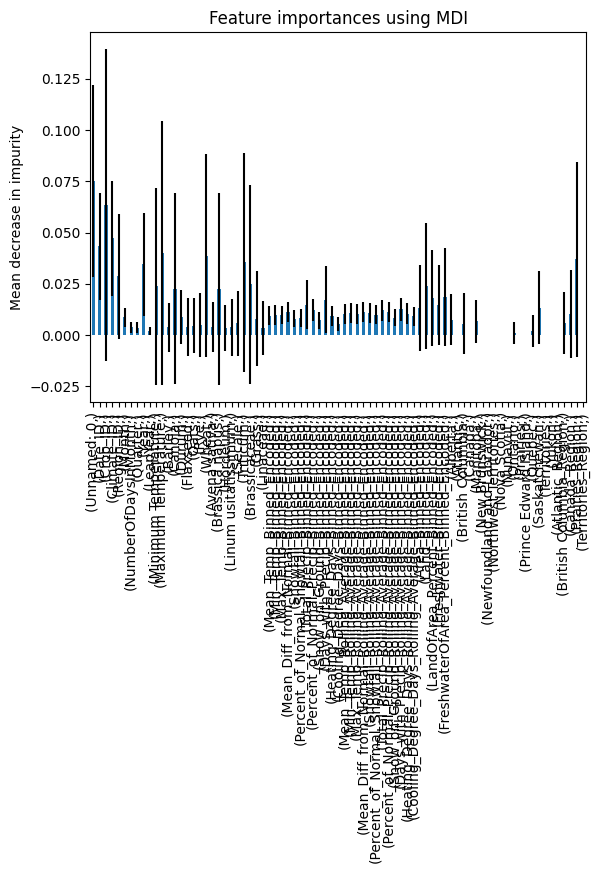

In [77]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()